# Objectives

- Basics of counting: Factorials - permutations and combinations

- What is probability:
 
- Axioms of Probability:
 
- Mutually exclusive events and independence

- Conditional Probability

## Counting 


<img src="img/counting.png"
     alt="Dice"
     style="float: center; margin-left: 40px;" />
     
### Product Rule of Counting :

If an experiment has two parts, where the first part can result in one of _m_ outcomes and the second part can result in one of _n_ outcomes regardless of the outcome of the first part, then the total number of outcomes for the experiment is _mn_.


__Q:__ Can you think of any example of that this rule is very handy when you are working with Python? (Hint - (i,j))

__A:__

__Example:__ Later on we will be using GridSearchCV algorithm to fine-tune parameters. There we can also use this basic principal of counting.
[Sklearn - GridSearchCV](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)


### Factorials

Factorials are basically a short hand notation for recursive multiplication. 
We start with assuming 
0! = 1
1! = 1

Then recursively define:

2! = 2.1!

3! = 3.2! = 3.2.1

4! = 4.3! = 4.3.2.1
.
.
.
n! = n.(n-1)! = n.(n-1).(n-2)...2.1

In [1]:
# for simulating the experiments
import numpy as np

# for visualizing the probabilities
import matplotlib.pyplot as plt

In [2]:
# define a function that returns factorials
def factorial(n):
    product = 1
    while n != 0:
        product *= n
        n -= 1
    return product

In [3]:
def factorial_rec(n):
    if n == 1:
        return 1
    return n * factorial_rec(n - 1)

In [4]:
# let's check whether our function works well.
factorial(10)

3628800

In [5]:
factorial_rec(10)

3628800

### Permutations

Permutation Rule: A permutation is an ordered arrangement of n distinct object. Those n objects can be permuted in $n \times (n–1) \times (n–2)\times... \times 2 \times 1=n!$ ways.

Example: iPhones have 4-digit passcodes. Suppose there are 4 smudges over 4 digits on the screen. How many distinct passcodes are possible?

A: 

__What if..__ 
What if there are 3 smudges over 3 digits on screen?

Let's write a code to solve this problem

In [6]:
my_list = ['a', 'b', 'c']

In [7]:
my_iter = iter(my_list)

In [11]:
next(my_iter)

StopIteration: 

In [1]:
import itertools

# here numbers are arbitrary and
# just for the purpose of demonstration

permutations = list(itertools.permutations(list(range(10)), 4))
print(len(permutations))

# can you write a function that returns
# all combinations with 3 letter?

5040


In [6]:
# Hint: Suppose that the numbers are {0,3,7} and
# suppose we know 0 is repeating.
# Then the following code returns all the possible
# 4 digit passwords with 0,3,7 with 0 is the only number repeating.


len(set(itertools.permutations([7, 3, 0, 0])))

12

### Permutation of Indistinct Objects: 
Generally when there are n objects and $n_1$ are the same (indistinguishable) and $n_2$ are the same and
... $n_r$ are the same, then there are $ \frac{n!}{n_1 ! n_2 ! \cdots n_r !}$ different permutations.

Example: How many distinct bit strings can be formed from three 0’s and two 1’s?

### Combinations

A combination is an unordered selection of r objects from a set of n objects. If all objects are distinct, then the number of ways of making the selection is:
$${n\choose r} = \frac{n!}{(n-r)! r!}$$ 

We read the expression on the left as "n choose k"".

__Q:__ Suppose we are given $5$ variables $x_1, \cdots, x_{5}$. How many terms are there in a second degree polynomial that we can create by using these variables? Note that we can have 

$$ 1+ a_1 x_1 + a_2 x_2 + \cdots +a_5 x_5 + b_{11} x_{1}^{2}+ \cdots + b_{55}x_{5}^{2} + b_{12}x_{1}x_{2} + \cdots + b_{45}x_{4}x_{5} $$

__Note__ This problem will be useful when we working with polynomial regression problems.


If you want to read extra examples on combinations please open the pdf using the link below and read the section clustering. This discussion will be relevant when we discuss machine learning algorithms like KNN, Kmeans etc.

[Counting](stanford_lecture_notes_counting.pdf)

In [7]:
list(itertools.combinations('abcd', 2))

[('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'c'), ('b', 'd'), ('c', 'd')]

## Probability

[It turns out that every coin toss is biased a little bit](https://www.youtube.com/watch?v=AYnJv68T3MM)

__What is Probability?__

- Probability is a measure between 0 and 1 quantifying the likelihood that events will occur. (Note that there are different philosophies to define probability but we will discuss later)

### Where do we use probability in data science?

__Classification problem:__

<img src="img/classification.png"
 alt="Dice"
 width = 400
 style="float: center; margin-left: 9px;" />

[Source of the image](https://en.wikipedia.org/wiki/Logistic_regression)


__Language Models__

<img src="img/NLP.png"
 alt="Dice"
 width = 400
 style="float: center; margin-left: 9px;" />

[Source of the image](https://towardsdatascience.com/learning-nlp-language-models-with-real-data-cdff04c51c25)


and many other applications.

### Event Space and Sample Space

__Sample Space (Usually denoted with S):__ The set of all possible outcomes of an experiment.

Experiments:

- coin flip

- Flipping two coins

- Roll of 6-sided die

- number of hours someone spends watching 'Friends':

__Event space:__ Some subset of sample space

Some event spaces corresponding to above experiments:

- Coin flip is heads:

- Number of heads is bigger or equal than 1 in flipping two coins experiment:

- Event of wasted days:(you spend more than 3 hours watching 'Friends'):

### Probability of an Event

$$ P(E) = \lim \frac{n(E)}{n} $$

What this means try the experiment $n$ times and count the number of times the event $E$ occurs ($n(E)$). Ratio as $n$ gets bigger and bigger defines the probability of E.


### Python playground
Let's simulate the probability of getting one or more heads in the experiment of tossing two coins.

In [9]:
# note that you can use multinomial to generate
# data from the experiment of flipping two coins
import numpy as np
experiments = np.random.multinomial(n=2,
                                    pvals=[0.5, 0.5],
                                    size=10)
experiments

array([[1, 1],
       [1, 1],
       [2, 0],
       [1, 1],
       [2, 0],
       [0, 2],
       [0, 2],
       [0, 2],
       [1, 1],
       [0, 2]])

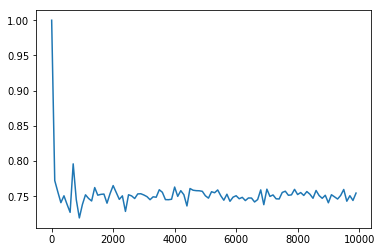

In [11]:
import matplotlib.pyplot as plt
def prob_of_E(outcomes, num_of_heads):
    """
    :param outcomes: np.array - [experiment_size, n_trials]
    :param num_of_heads: int. Event is the getting num_of_heads or more.
    :return: float - returns the frequency of event getting num_of_heads or more given outcomes
    """
    n_E = (outcomes[:, 0] >= num_of_heads).sum()
    return n_E/len(outcomes)


probabilities = []

for i in range(1, 10001):
    experiment = np.random.multinomial(n=2, pvals=[0.5, 0.5], size=i)
    prob = prob_of_E(outcomes=experiment, num_of_heads=1)
    probabilities.append(prob)

%matplotlib inline

plt.plot(range(1, 10001, 100),
         probabilities[::100])

### Axioms of Probability

- Axiom 1: Probability of an event is always between 0 and 1 (therefore non-negative) 

$$0 \leq P(E) \leq 1$$

- Axiom 2: With probability 1, an outcome of an experiment will be an element of the sample space.  

$$P(S) = 1$$

__Mutually Exclusive Events:__

We say two events *E* and _F_ are mutually exclusive if $E\cap F = \emptyset$. 

- Axiom 3: For mutually exclusive events 

For mutually exclusive events $E, F$ we have $P(E \cup F) = P(E) + P(F)$.

More generally, if $E_1, E_2, \cdots\, E_{n}$ are mutually exclusive then we have:

$$P \big(\bigcup\limits_{i=1}^{n} E_{i} \big) = \sum\limits_{i=1}^{n} P(E_{i})$$

From these axioms we can prove the following properties of the probability: (Try these!)

$$ P(E^{c}) = 1- P(E)$$

$$ P(\emptyset) = 0 $$

$$ P(E \cup F) = P(E) + P(F) - P(E \cap F)$$


### Conditional Probability and Independence

#### Independent Events

Events $A$ and $B$ are independent when the occurrence of $A$ has no effect on whether $B$ will occur (or not).
 
Examples:

* Getting heads after flipping a coin **and** getting a 5 after throwing a fair dice
* Choosing a marble from a container **and** getting heads after flipping a coin


#### Dependent Events


Events $A$ and $B$ are dependent when the occurrence of $A$ somehow has an effect on whether $B$ will occur (or not).

[Let's see an example of dependent events from learn.co](https://learn.co/tracks/data-science-career-v2/module-3-probability-sampling-and-ab-testing/section-17-combinatorics-and-probability/conditional-probability)


#### Conditional Probability


Conditional probability emerges when the outcome a trial may influence the results of the upcoming trials.

* Drawing a 2nd Ace from a deck of cards given that the first card you drew was an Ace.
* Finding the probability of liking "The Matrix" given that you know this person likes science fiction.

__Notation__: The conditional probability (Probability of $A$ **given** $B$) can be written as:
$$ P (A \mid B) = \dfrac{P(A \cap B)}{P(B)}$$




## Recap and Exit ticket

- Factorials - permutations - combinations

- Definition of probability

- Axioms of probability

- Mutually exclusive events

- Independent events

- Conditional probability

[Exit Ticket](https://forms.gle/j6FQzdAfGGLzRsXc8)



[If time allows](https://learn.co/tracks/data-science-career-v2/module-3-probability-sampling-and-ab-testing/section-17-combinatorics-and-probability/introduction-to-probability-lab)
